In [54]:
# Import Packages
import pandas as pd # Used to work with datasets
import numpy as np # Used to work with arrays


#Visualization
import matplotlib.pyplot as plt
import seaborn as sns



import sklearn
from sklearn.neighbors import KNeighborsClassifier #Classifier implementing the k-nearest neighbors vote
from sklearn.tree import DecisionTreeClassifier## is a class capable of performing multiclass classification on a dataset.
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier#Iteratively trains because at each time step the partial derivatives of the loss function with respect to the model parameters are computed.
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.mixture import BayesianGaussianMixture
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
'''import lightgbm as ltb'''
from catboost import CatBoostClassifier, Pool
from catboost.utils import get_confusion_matrix


from sklearn.preprocessing import StandardScaler## Removes the average and scales each feature/variable for unit variance. This process is carried out in an independent manner
from sklearn.model_selection import train_test_split , cross_val_score,KFold,GridSearchCV

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix,classification_report
#from sklearn.metrics import plot_confusion_matrix



import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [55]:
from google.colab import drive

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
path = '/content/drive/MyDrive/data/diabetesKaggle.csv'

In [57]:
#read data
diabetes = pd.read_csv(path)


In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
#name columns
print(diabetes.columns)

Index(['Age', 'Gender', 'BMI', 'SBP', 'DBP', 'FPG', 'Chol', 'Tri', 'HDL',
       'LDL', 'ALT', 'BUN', 'CCR', 'FFPG', 'smoking', 'drinking',
       'family_histroy', 'Diabetes'],
      dtype='object')


In [60]:
diabetes.head() # Show part of the data

,Age,Gender,BMI,SBP,DBP,FPG,Chol,Tri,HDL,LDL,ALT,BUN,CCR,FFPG,smoking,drinking,family_histroy,Diabetes
0,26,1,20.1,119,81,5.80,4.36,0.86,0.90,2.43,12.0,5.40,63.8,5.40,3.0,3.0,0,0
1,40,1,17.7,97,54,4.60,3.70,1.02,1.50,2.04,9.2,3.70,70.3,4.10,1.0,1.0,0,0
2,40,2,19.7,85,53,5.30,5.87,1.29,1.75,3.37,10.1,4.10,61.1,4.85,3.0,3.0,0,0
3,43,1,23.1,111,71,4.50,4.05,0.74,1.27,2.60,36.5,4.38,73.4,5.30,2.0,3.0,0,0
4,36,1,26.5,130,82,5.54,6.69,3.49,0.91,3.64,69.3,3.86,67.5,5.53,3.0,3.0,0,0


In [61]:
## print about information
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4303 entries, 0 to 4302
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             4303 non-null   int64  
 1   Gender          4303 non-null   int64  
 2   BMI             4303 non-null   float64
 3   SBP             4303 non-null   int64  
 4   DBP             4303 non-null   int64  
 5   FPG             4303 non-null   float64
 6   Chol            4303 non-null   float64
 7   Tri             4303 non-null   float64
 8   HDL             4303 non-null   float64
 9   LDL             4303 non-null   float64
 10  ALT             4303 non-null   float64
 11  BUN             4303 non-null   float64
 12  CCR             4303 non-null   float64
 13  FFPG            4303 non-null   float64
 14  smoking         4303 non-null   float64
 15  drinking        4303 non-null   float64
 16  family_histroy  4303 non-null   int64  
 17  Diabetes        4303 non-null   i

Here chol_hdl_ratio, bmi, waist_hip_ratio are numbric data but showing object so need to change.

In [62]:
## print about information again
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4303 entries, 0 to 4302
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             4303 non-null   int64  
 1   Gender          4303 non-null   int64  
 2   BMI             4303 non-null   float64
 3   SBP             4303 non-null   int64  
 4   DBP             4303 non-null   int64  
 5   FPG             4303 non-null   float64
 6   Chol            4303 non-null   float64
 7   Tri             4303 non-null   float64
 8   HDL             4303 non-null   float64
 9   LDL             4303 non-null   float64
 10  ALT             4303 non-null   float64
 11  BUN             4303 non-null   float64
 12  CCR             4303 non-null   float64
 13  FFPG            4303 non-null   float64
 14  smoking         4303 non-null   float64
 15  drinking        4303 non-null   float64
 16  family_histroy  4303 non-null   int64  
 17  Diabetes        4303 non-null   i

In [63]:
#check is null data
diabetes.isnull().sum()

Age               0
Gender            0
BMI               0
SBP               0
DBP               0
FPG               0
Chol              0
Tri               0
HDL               0
LDL               0
ALT               0
BUN               0
CCR               0
FFPG              0
smoking           0
drinking          0
family_histroy    0
Diabetes          0
dtype: int64

<Axes: xlabel='Diabetes', ylabel='count'>

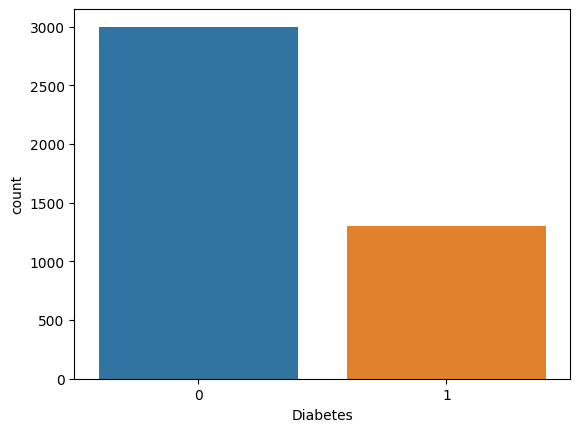

In [64]:
## The number of views in each categorical basket using bars.
sns.countplot(data= diabetes , x='Diabetes',label="Count")

In [65]:
diabetes['OUTPUT'].value_counts() #CHUY!!!!!!!!!!!!!

0    3000
1    1303
Name: Diabetes, dtype: int64

In [66]:
## print describtion
diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4303.0,48.085057,14.686155,22.000000,35.00,46.00,59.00,93.000000
Gender,4303.0,1.351615,0.477530,1.000000,1.00,1.00,2.00,2.000000
BMI,4303.0,24.123923,3.397294,15.600000,21.70,24.00,26.30,45.800000
SBP,4303.0,123.219382,17.513858,72.000000,111.00,122.00,134.00,200.000000
DBP,4303.0,76.360446,11.004056,45.000000,69.00,76.00,83.00,134.000000
FPG,4303.0,5.226368,0.781089,1.780000,4.70,5.14,5.70,6.990000
Chol,4303.0,4.860753,0.925377,1.650000,4.20,4.79,5.43,11.650000
Tri,4303.0,1.588476,1.260003,0.000000,0.86,1.28,1.94,32.640000
HDL,4303.0,1.666765,1.079377,0.000000,1.13,1.34,1.61,4.860753
LDL,4303.0,2.976220,0.892196,0.540000,2.35,2.82,3.42,6.270000


The following is the normal range of the different blood solutes:
1. Cholestrol - under 200
2. Glucose 80-120(normal)
3. HDL Cholestrol more than 60
4. Systolic BP - 120
5. Distolic BP - 80

Following are the points of concern in the above code output:
- Maximum cholestrol found in the data is 443, glucose 385, hdl -cholestrol 120, systolic BP 250, distolic 124
- Minimum hdl-chol value is 12.
- The weight of the 75% of patients is between 99-200.

DataPreProcessing

In [67]:
df = diabetes


### Features for building the model  
 1.  cholesterol      
 2.  glucose          
 3.  hdl_chol           
 4.  age              
 5.  gender                      
 6.  weight                         
 7.  systolic_bp      
 8.  diastolic_bp     
 9.  diabetes - The target    

In [68]:
X= df[['INPUT']] #CHUY!!!!!!!!!!!!!!!!!!!!!!!!!!!
y=df['OUTPUT'] #CHUY!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [69]:
#create List models
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('LogisticRegression', LogisticRegression()))
models.append(('LinearDiscriminantAnalysis', LinearDiscriminantAnalysis()))
models.append(('GaussianNB', GaussianNB()))
models.append(('MLPClassifier', MLPClassifier()))
models.append(('CatBoost', CatBoostClassifier()))
#models.append(('BayesianGaussianMixture', BayesianGaussianMixture()))
#models.append(('SGDClassifier', SGDClassifier()))
#models.append(('RandomForestClassifier', RandomForestClassifier()))

In [70]:

# calculate accuracy
scoring_=[]

name_m=[]



for i in range(len(models)):
    kfold = KFold(n_splits=10, shuffle=True, random_state=43)
    scor = cross_val_score(models[i][1], X, y, cv=kfold, scoring='accuracy')
    scoring_.append(scor)
    name_m.append(models[i][0])
    print("{} : score {:.3f} ".format(models[i][0]  , np.mean(scoring_)  ))

Streaming output truncated to the last 5000 lines.
5:	learn: 0.5307169	total: 21.6ms	remaining: 3.57s
6:	learn: 0.5072741	total: 25.3ms	remaining: 3.59s
7:	learn: 0.4842900	total: 29.2ms	remaining: 3.62s
8:	learn: 0.4656961	total: 32.9ms	remaining: 3.62s
9:	learn: 0.4461818	total: 36.7ms	remaining: 3.63s
10:	learn: 0.4293966	total: 40.4ms	remaining: 3.63s
11:	learn: 0.4109564	total: 43.3ms	remaining: 3.56s
12:	learn: 0.3953852	total: 46.2ms	remaining: 3.51s
13:	learn: 0.3798666	total: 50ms	remaining: 3.52s
14:	learn: 0.3661896	total: 54.2ms	remaining: 3.56s
15:	learn: 0.3514311	total: 58.1ms	remaining: 3.57s
16:	learn: 0.3393605	total: 62ms	remaining: 3.58s
17:	learn: 0.3271759	total: 65.8ms	remaining: 3.59s
18:	learn: 0.3157710	total: 69.7ms	remaining: 3.6s
19:	learn: 0.3051093	total: 73.7ms	remaining: 3.61s
20:	learn: 0.2950545	total: 77.5ms	remaining: 3.61s
21:	learn: 0.2860796	total: 81.3ms	remaining: 3.62s
22:	learn: 0.2788328	total: 84.2ms	remaining: 3.58s
23:	learn: 0.2712159	to

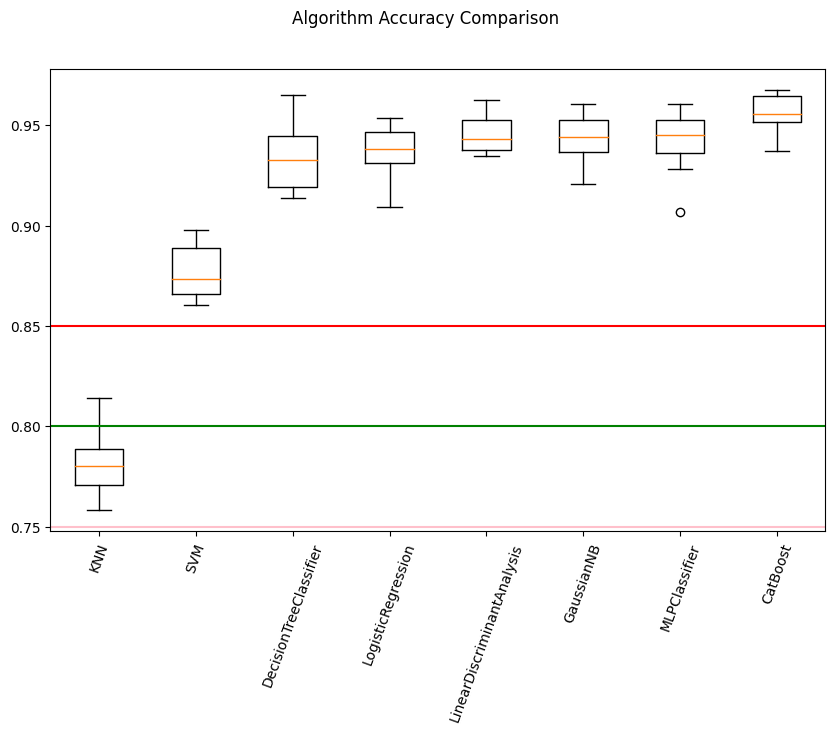

In [71]:
# visualization boxplot Algorithm Accuracy Comparison
fig = plt.figure(figsize=(10,6))
fig.suptitle('Algorithm Accuracy Comparison')
ax = fig.add_subplot(111)

plt.boxplot(scoring_)
plt.axhline(0.75, color='pink', linestyle='solid')
plt.axhline(0.80, color='green', linestyle='solid')
plt.axhline(0.85, color='red', linestyle='solid')
ax.set_xticklabels(name_m,rotation=70)
plt.show()

In [72]:
def confusion_matrix_sh(confusion_matrix, class_labels):
    """
    Display the confusion matrix using matplotlib.
    """

    # Normalize the confusion matrix
    confusion_matrix_normalized = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]

    # Set up the figure
    plt.figure(figsize=(8, 6))
    plt.imshow(confusion_matrix_normalized, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(class_labels))
    plt.xticks(tick_marks, class_labels, rotation=45)
    plt.yticks(tick_marks, class_labels)

    # Add labels to each cell
    thresh = confusion_matrix_normalized.max() / 2.0
    for i, j in np.ndindex(confusion_matrix.shape):
        plt.text(j, i, format(confusion_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if confusion_matrix_normalized[i, j] > thresh else "black")

    # Set axis labels
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')

    # Show the plot
    plt.tight_layout()
    plt.show()

In [73]:
# function evaluation
def evaluate(model,X,target):
    """
    Evaluate the performance of the model

    Inputs:
     Model ,
     Data ,
     Target .


    Outputs:
    Accuracy,
    Precision
    Recall
    F1 Score
    AUC-ROC
    confusion matrix
    """

    #split the data into training and testing
    X_train,X_test ,y_train , y_test=train_test_split(X , target ,test_size=0.25 , random_state=543 )

    model.fit(X_train , y_train)  # fit model

    y_pred=model.predict(X_test)


    print("model: ",model)

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

    # Precision
    precision = precision_score(y_test, y_pred)
    print("Precision:", precision)

    # Recall
    recall = recall_score(y_test, y_pred)
    print("Recall:", recall)

    # F1 Score
    f1 = f1_score(y_test, y_pred)
    print("F1 Score:", f1)

    # AUC-ROC
    auc_roc = roc_auc_score(y_test, y_pred)
    print("AUC-ROC:", auc_roc)



    # Confusion Matrix
    confusion = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", confusion)

    """

    #confusion matrix
    con_matrix = plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.bone_r ,colorbar=True,labels=[0,1])
    con_matrix.ax_.set_title("Confusion Matrix")


    """

    report = classification_report(y_test, y_pred)
    print(report)


# Model Training - KNN

In [74]:
#split data into train ,split
X_train, X_test, y_train, y_test = train_test_split(X,y , random_state=540)

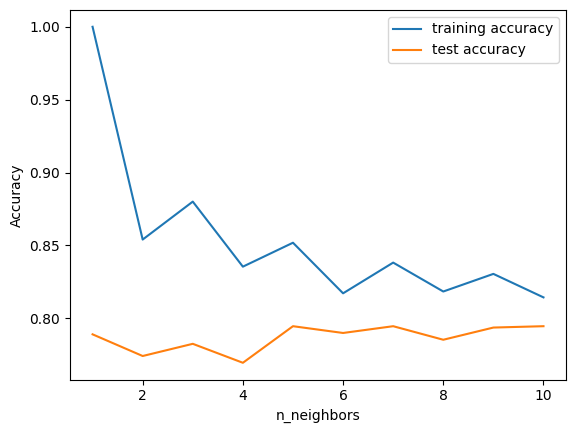

In [75]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # bulding nodel
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [76]:
## check   accuracy of the k-nearest neighbors
evaluate(KNeighborsClassifier(n_neighbors=5), X,y)

model:  KNeighborsClassifier()
Accuracy: 0.7630111524163569
Precision: 0.679324894514768
Recall: 0.47352941176470587
F1 Score: 0.5580589254766031
AUC-ROC: 0.6851342710997442
Confusion Matrix:
 [[660  76]
 [179 161]]
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       736
           1       0.68      0.47      0.56       340

    accuracy                           0.76      1076
   macro avg       0.73      0.69      0.70      1076
weighted avg       0.75      0.76      0.75      1076



In [77]:
model=SVC()
model.fit(X_train , y_train)
y_pred=model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8745353159851301


In [78]:
param_grid = {'C': [0.1, 1, 10,100,1000,10000], 'gamma': [0.0001,0.001,0.01, 0.1, 1,10,100,1000]}

# Create an instance of the model
model = SVC()

# Create an instance of GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=2)

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameter
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

# Evaluate the model with the best parameters
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)

# Print the results
print("Best Parameters: ", best_params)
print("Best Accuracy: ", best_accuracy)
print("Test Accuracy: ", test_accuracy)

Best Parameters:  {'C': 100, 'gamma': 0.0001}
Best Accuracy:  0.95010893522349
Test Accuracy:  0.9488847583643123


In [79]:
## check   accuracy of the  SVC

evaluate(grid_search,X,y)

model:  GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000, 10000],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]})
Accuracy: 0.9507434944237918
Precision: 0.9644012944983819
Recall: 0.8764705882352941
F1 Score: 0.9183359013867489
AUC-ROC: 0.9307624680306905
Confusion Matrix:
 [[725  11]
 [ 42 298]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.96       736
           1       0.96      0.88      0.92       340

    accuracy                           0.95      1076
   macro avg       0.95      0.93      0.94      1076
weighted avg       0.95      0.95      0.95      1076



In [80]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train,y_train))) # To calculate the accuracy of the training data
print("Accuracy on test set: {:.3f}".format(tree.score(X_test,y_test)))   # To calculate the accuracy of the test data

Accuracy on training set: 1.000
Accuracy on test set: 0.934


In [81]:
## We check   accuracy of the  Decision tree classifier algorithm for predicting diabetes
model_tree= DecisionTreeClassifier(criterion="entropy", max_depth = 3,ccp_alpha=2,min_samples_split=5)
evaluate(model_tree, X,y)

model:  DecisionTreeClassifier(ccp_alpha=2, criterion='entropy', max_depth=3,
                       min_samples_split=5)
Accuracy: 0.6840148698884758
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC: 0.5
Confusion Matrix:
 [[736   0]
 [340   0]]
              precision    recall  f1-score   support

           0       0.68      1.00      0.81       736
           1       0.00      0.00      0.00       340

    accuracy                           0.68      1076
   macro avg       0.34      0.50      0.41      1076
weighted avg       0.47      0.68      0.56      1076



In [82]:
## We check   accuracy of the Logistic Regression
evaluate(LogisticRegression(), X,y)

model:  LogisticRegression()
Accuracy: 0.9349442379182156
Precision: 0.9272151898734177
Recall: 0.861764705882353
F1 Score: 0.8932926829268293
AUC-ROC: 0.9152573529411765
Confusion Matrix:
 [[713  23]
 [ 47 293]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       736
           1       0.93      0.86      0.89       340

    accuracy                           0.93      1076
   macro avg       0.93      0.92      0.92      1076
weighted avg       0.93      0.93      0.93      1076



In [83]:
evaluate(LinearDiscriminantAnalysis(),X, y)

model:  LinearDiscriminantAnalysis()
Accuracy: 0.9442379182156134
Precision: 0.9794520547945206
Recall: 0.8411764705882353
F1 Score: 0.9050632911392404
AUC-ROC: 0.916512148337596
Confusion Matrix:
 [[730   6]
 [ 54 286]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       736
           1       0.98      0.84      0.91       340

    accuracy                           0.94      1076
   macro avg       0.96      0.92      0.93      1076
weighted avg       0.95      0.94      0.94      1076



In [84]:
evaluate(GaussianNB(),X,y)

model:  GaussianNB()
Accuracy: 0.9460966542750929
Precision: 0.9196428571428571
Recall: 0.9088235294117647
F1 Score: 0.9142011834319527
AUC-ROC: 0.9360693734015344
Confusion Matrix:
 [[709  27]
 [ 31 309]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       736
           1       0.92      0.91      0.91       340

    accuracy                           0.95      1076
   macro avg       0.94      0.94      0.94      1076
weighted avg       0.95      0.95      0.95      1076



In [85]:

mlp = MLPClassifier(max_iter=100, alpha=0.001,   random_state=0)
mlp.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format( mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test,y_test)))


Accuracy on training set: 0.948
Accuracy on test set: 0.934


In [86]:
## We check   accuracy of the  MLP Classi fier algorithm for predicting diabetes
evaluate(MLPClassifier(max_iter=100, alpha=1), X,y)

model:  MLPClassifier(alpha=1, max_iter=100)
Accuracy: 0.9386617100371747
Precision: 0.9477124183006536
Recall: 0.8529411764705882
F1 Score: 0.8978328173374613
AUC-ROC: 0.9156010230179029
Confusion Matrix:
 [[720  16]
 [ 50 290]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       736
           1       0.95      0.85      0.90       340

    accuracy                           0.94      1076
   macro avg       0.94      0.92      0.93      1076
weighted avg       0.94      0.94      0.94      1076



In [87]:
evaluate(RandomForestClassifier(),X,y)

model:  RandomForestClassifier()
Accuracy: 0.9563197026022305
Precision: 0.956386292834891
Recall: 0.9029411764705882
F1 Score: 0.928895612708018
AUC-ROC: 0.9419597186700767
Confusion Matrix:
 [[722  14]
 [ 33 307]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       736
           1       0.96      0.90      0.93       340

    accuracy                           0.96      1076
   macro avg       0.96      0.94      0.95      1076
weighted avg       0.96      0.96      0.96      1076



In [88]:
evaluate(CatBoostClassifier(),X,y)

Learning rate set to 0.01699
0:	learn: 0.6654101	total: 3.72ms	remaining: 3.72s
1:	learn: 0.6411882	total: 7.55ms	remaining: 3.77s
2:	learn: 0.6165352	total: 11ms	remaining: 3.66s
3:	learn: 0.5917293	total: 14.5ms	remaining: 3.6s
4:	learn: 0.5659038	total: 17.9ms	remaining: 3.56s
5:	learn: 0.5431351	total: 21.3ms	remaining: 3.53s
6:	learn: 0.5223458	total: 24.7ms	remaining: 3.5s
7:	learn: 0.5028901	total: 28.1ms	remaining: 3.49s
8:	learn: 0.4858937	total: 31.6ms	remaining: 3.48s
9:	learn: 0.4692432	total: 34.9ms	remaining: 3.46s
10:	learn: 0.4512348	total: 38.4ms	remaining: 3.46s
11:	learn: 0.4361380	total: 42ms	remaining: 3.46s
12:	learn: 0.4202018	total: 44.6ms	remaining: 3.38s
13:	learn: 0.4051606	total: 48.1ms	remaining: 3.39s
14:	learn: 0.3919623	total: 55.7ms	remaining: 3.66s
15:	learn: 0.3790655	total: 61.1ms	remaining: 3.76s
16:	learn: 0.3681292	total: 67ms	remaining: 3.87s
17:	learn: 0.3562507	total: 74.5ms	remaining: 4.07s
18:	learn: 0.3450610	total: 78.1ms	remaining: 4.03s
1